In [92]:
# manipulacja danymi
import numpy as np
import pandas as pd
import scipy

# wizualizacja danych
import matplotlib.pyplot as plt
import seaborn as sns

# statystyczna analiza danych
from scipy import stats

# przygotowanie danych
from sklearn.preprocessing import StandardScaler, MinMaxScaler
dataset = pd.read_csv('titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
d_fare = dataset['Fare']

In [94]:
d_fare.head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

Średnia = 32.2042079685746, Mediana = 14.4542, Moda = 0    8.05
Name: Fare, dtype: float64


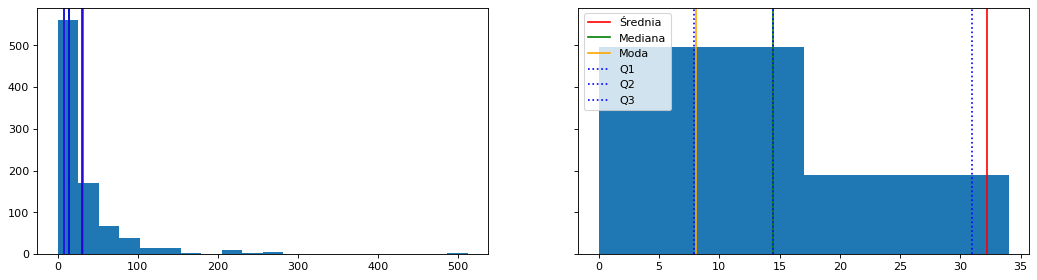

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16,4), dpi=80)


d_mean = d_fare.mean()
d_median = d_fare.median()
d_mode = d_fare.mode()
q1 = np.quantile(d_fare,0.25)
q2 = np.quantile(d_fare,0.5)
q3 = np.quantile(d_fare,0.75)
print(f'Średnia = {d_mean}, Mediana = {d_median}, Moda = {d_mode}')
ax1.axvline(x = d_mean, color='red', label = 'Średnia')
ax1.axvline(x = d_median, color='green', label = 'Mediana')
ax1.axvline(x = d_mode[0], color='orange', label = 'Moda')
ax1.axvline(x = q1, color='blue', label = 'Q1')
ax1.axvline(x = q2, color='blue', label = 'Q2')
ax1.axvline(x = q3, color='blue', label = 'Q3')
ax1.hist(d_fare, bins=20)

ax2.axvline(x = d_mean, color='red', label = 'Średnia')
ax2.axvline(x = d_median, color='green', label = 'Mediana')
ax2.axvline(x = d_mode[0], color='orange', label = 'Moda')
ax2.axvline(x = q1, color='blue', label = 'Q1', linestyle='dotted')
ax2.axvline(x = q2, color='blue', label = 'Q2', linestyle='dotted')
ax2.axvline(x = q3, color='blue', label = 'Q3', linestyle='dotted')
ax2.hist(d_fare, bins=2, range=(0, 34))
ax2.legend()

In [ ]:
print(f'Odchylenie standardowe: {np.std(d_fare, ddof=1)}')

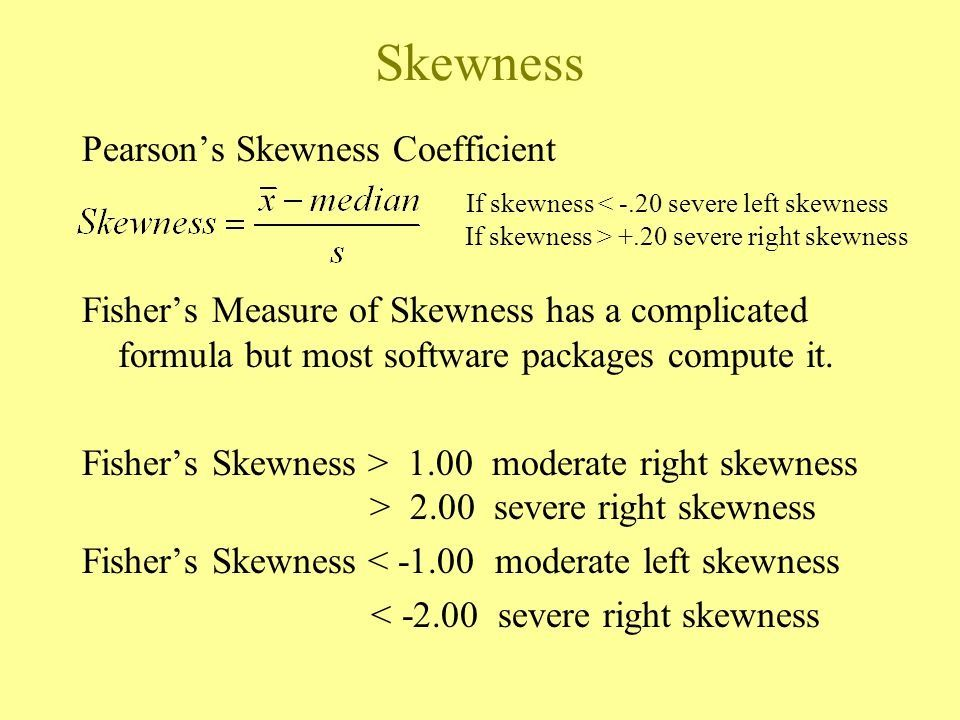

In [ ]:
scipy.stats.skew(d_fare)

<AxesSubplot:>

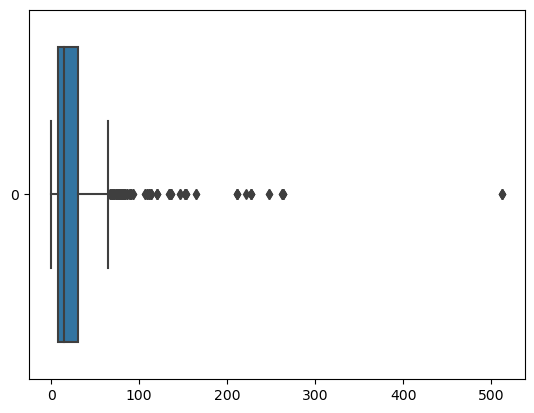

In [122]:
sns.boxplot(d_fare, orient='h')

In [123]:
variance_fare = np.var(d_fare, ddof=1)
print(variance_fare)

2469.436845743117


In [130]:
print(round(variance_fare**(1/2),2))

49.69


In [131]:
round(q3-q1,2)

23.09

In [133]:
count = 0
fare_sum = 0
count2 = 0
fare_sum2 = 0
for n in d_fare:
    if n > q3:
        count+=1
        fare_sum += n
    if n > q1 and n < q3:
        count2+=1
        fare_sum2 += n
print(f"Zbiór składa się z n = {len(d_fare)} elementów count, z czego {count} jest poza 3 kwantylem, a w 50% populacji znajduje się {count2} elementów.")
print(fare_sum, fare_sum2)


Zbiór składa się z n = 891 elementów count, z czego 222 jest poza 3 kwantylem, a w 50% populacji znajduje się 443 elementów.
19686.487599999986 7345.841400000009


<font color="green"><b>Zbiór dotyczący cen biletów jest różnorodny, składa się z 891 rekordów z czego 222 są poza 3 kwantylem. Natomiast 50% populacji składa się z 443 elementów w odległości 23.09 - w tym przypadku w granicy 23.09$</font></b>

<font color="green"><b>Odchylenie standardowe wynosi 49.69$ od średniej 32.20$. Grupa 50% populacji wydaje się być zagęszczona (blisko siebie). Z uwagi na to, że najdroższe bilety znajdują się poza rozstępem ćwiartkowym możemy uznać, że przewoźnik mógł najwięcej zarobić na pasażerach kupujących tańsze bilety.</font></b>